In [2]:
pivot[iStar_, jStar_, tab_] := (
  nRows = Dimensions[tab][[1]];
  nCols = Dimensions[tab][[2]];
  newTab = tab;
  newTab[[1, jStar]] = tab[[iStar, nCols]];
  newTab[[iStar, nCols]] = tab[[1, jStar]];
  For[ii = 2, ii <= nRows, ii++,
   For[jj = 1, jj < nCols, jj++,
     If[ii == iStar && jj == jStar, 
      newTab[[ii, jj]] = 1/tab[[iStar, jStar]]];
     If[ii == iStar && jj != jStar, 
      newTab[[ii, jj]] = -tab[[ii, jj]]/tab[[iStar, jStar]]];
     If[ii != iStar && jj == jStar, 
      newTab[[ii, jj]] = tab[[ii, jj]]/tab[[iStar, jStar]]];
     If[ii != iStar && jj != jStar, 
      newTab[[ii, jj]] = 
       tab[[ii, jj]] - 
        tab[[iStar, jj]]*tab[[ii, jStar]]/tab[[iStar, jStar]]
      ];
    ];
  ];
  Return[newTab]
)

In [3]:
(*"
min z = -2x1 - 4x2 + 4
   g1 = 4x1 + 3x2 <= 48
   g2 = 4x1 + 3x2 >= 24
   g3 = 3x1 - 1x2 >= -6
   g4 = 3x1 - 1x2 <=  6
"*)

In [4]:
(*"
Define the
1) objective function
2) constraint functions
3) constants
4) slack functions
"*)
Clear[s1, s2, s3, s4, z]
z[x1_, x2_] := -2 x1 - 4 x2 + 4;
g1[x1_, x2_] := 4 x1 + 3 x2;
g2[x1_, x2_] := 4 x1 + 3 x2;
g3[x1_, x2_] := 3 x1 - 1 x2 ;
g4[x1_, x2_] := 3 x1 - 1 x2 ;
b1 = 48;
b2 = 24;
b3 = -6;
b4 = 6;
s1[x1_, x2_] := -g1[x1, x2] + b1;
s2[x1_, x2_] := g2[x1, x2] - b2;
s3[x1_, x2_] := g3[x1, x2] - b3;
s4[x1_, x2_] := -g4[x1, x2] + b4;

In [19]:
(*
solve for the constraint boundaries
*)

g1[x1_] = x2 /. Solve[g1[x1, x2] == b1, {x2}][[1, 1]];
g2[x1_] = x2 /. Solve[g2[x1, x2] == b2, {x2}][[1, 1]];
g3[x1_] = x2 /. Solve[g3[x1, x2] == b3, {x2}][[1, 1]];
g4[x1_] = x2 /. Solve[g4[x1, x2] == b4, {x2}][[1, 1]];

-Graphics-
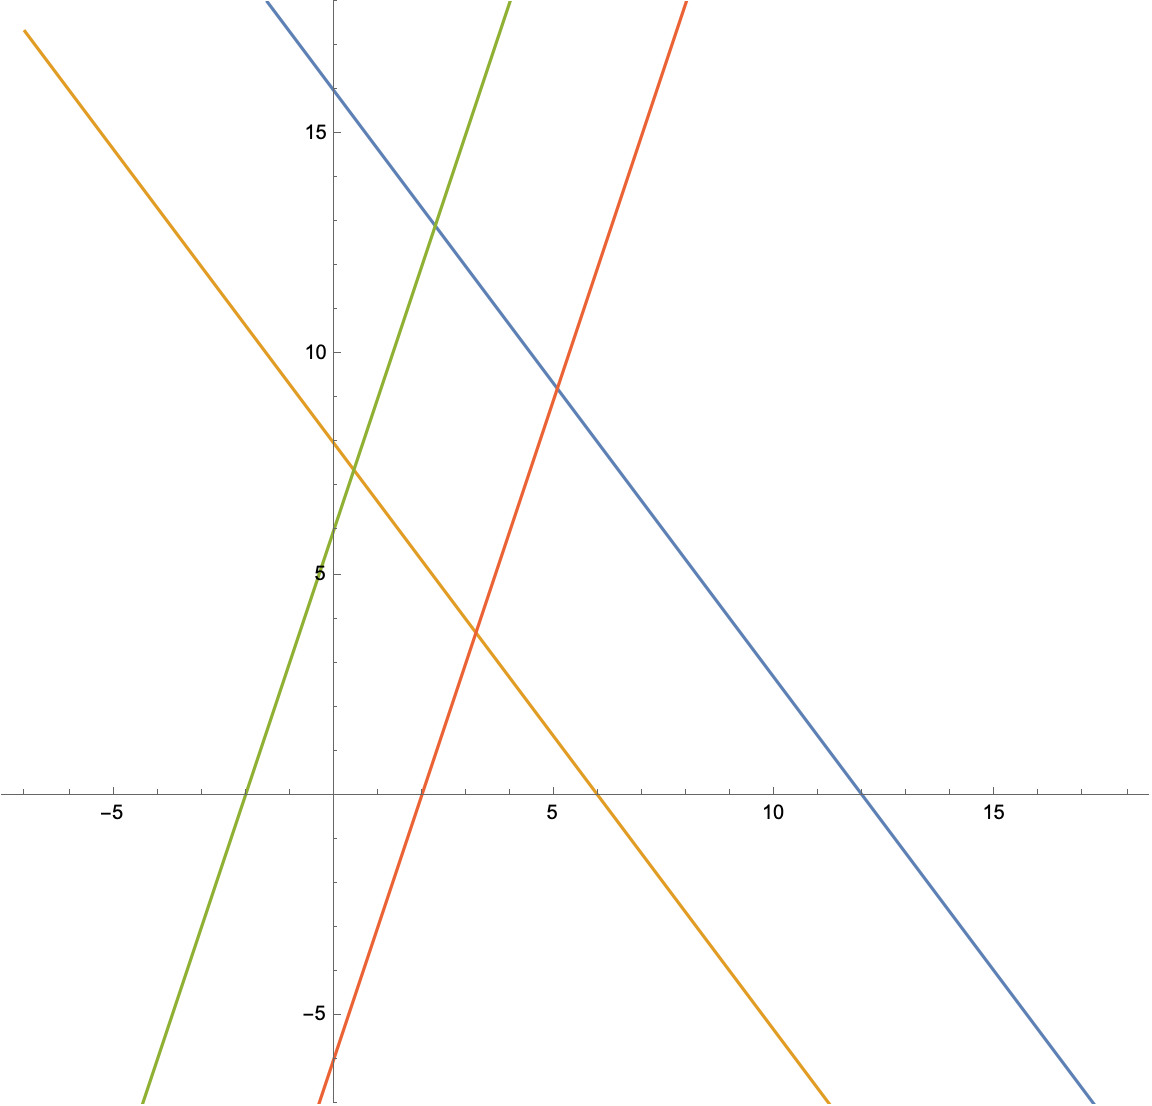

In [25]:
(*
plot the constraint boundaries
*)

Plot[
 {g1[x], g2[x], g3[x], g4[x]},
 {x, -7, 18},
 AspectRatio -> Automatic,
 ImageSize -> Large,
 PlotRange -> {-7, 18}
]

In [26]:
(*
[A]
*)

a0 = {"x1", "x2", 1, ""};
a1 = {-4, -3, 48, "s1"};
a2 = {4, 3, -24, "s2"};
a3 = {3, -1, 6, "s3"};
a4 = {-3, 1, 6, "s4"};
aobj = {-2, -4, 4, "z->min"};
a = {a0, a1, a2, a3, a4, aobj};
Print["a = ", MatrixForm[a]]

a = x1       x2       1

    -4       -3       48       s1

    4        3        -24      s2

    3        -1       6        s3

    -3       1        6        s4

    -2       -4       4        z->min


In [35]:
(*
[A] BASIC SOLUTION
*)

x1 = 0;
x2 = 0;
zz = 4;
ss1 = 48;
ss2 = -24;
ss3 = 6;
ss4 = 6;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = 0 x2 = 0 z = 4
True,True,True,True,True


In [45]:
(*
[B]
*)

b = pivot[4, 1, a];
Print["b = ", MatrixForm[b]]

b = 

    s3       x2       1

      4        13
    -(-)     -(--)
      3        3      56       s1

    4        13
    -        --
    3        3        -32      s2

    1        1
    -        -
    3        3        -2       x1



    -1       0        12       s4

      2        14
    -(-)     -(--)
      3        3      8        z->min


In [48]:
(*
[B] BASIC SOLUTION
*)

x1 = -2;
x2 = 0;
zz = 8;
ss1 = 56;
ss2 = -32;
ss3 = 0;
ss4 = 12;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = -2 x2 = 0 z = 8
True,True,True,True,True


In [58]:
(*
[C]
*)

c = pivot[3, 2, b];
Print["c = ", MatrixForm[c]]

c = 

    s3       s2       1



    0        -1       24       s1

      4      3        96
    -(--)    --       --
      13     13       13       x2

    3        1        6
    --       --       --
    13       13       13       x1



    -1       0        12       s4

    10         14       344
    --       -(--)    -(---)
    13         13       13     z->min


In [61]:
(*
[C] BASIC SOLUTION
*)

x1 = 6/13;
x2 = 96/13;
zz = -344/13;
ss1 = 24;
ss2 = 0;
ss3 = 0;
ss4 = 12;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

     6       96       344
x1 = -- x2 = -- z = -(---)
     13      13       13
True,True,True,True,True


In [71]:
(*
[D]
*)

d = pivot[2, 2, c];
Print["d = ", MatrixForm[d]]

d = 

    s3       s1       1



    0        -1       24       s2

      4        3      168
    -(--)    -(--)    ---
      13       13     13       x2

    3          1      30
    --       -(--)    --
    13         13     13       x1



    -1       0        12       s4

    10       14         680
    --       --       -(---)
    13       13         13     z->min


In [74]:
(*
[D] BASIC SOLUTION
*)

x1 = 30/13;
x2 = 168/13;
zz = -680/13;
ss1 = 0;
ss2 = 24;
ss3 = 0;
ss4 = 12;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

     30      168       680
x1 = -- x2 = --- z = -(---)
     13      13        13
True,True,True,True,True


In [84]:
(*
[E]
*)

e = pivot[5, 1, d];
Print["e = ", MatrixForm[e]]

e = 

    s4       s1       1



    0        -1       24       s2

    4          3      120
    --       -(--)    ---
    13         13     13       x2

      3        1      66
    -(--)    -(--)    --
      13       13     13       x1



    -1       0        12       s3

      10     14         560
    -(--)    --       -(---)
      13     13         13     z->min


In [87]:
(*
[E] BASIC SOLUTION
*)

x1 = 66/13;
x2 = 120/13;
zz = -560/13;
ss1 = 0;
ss2 = 24;
ss3 = 12;
ss4 = 0;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

     66      120       560
x1 = -- x2 = --- z = -(---)
     13      13        13
True,True,True,True,True


In [97]:
(*
[F]
*)

f = pivot[2, 2, e];
Print["f = ", MatrixForm[f]]

f = 

    s4       s2       1



    0        -1       24       s1

    4        3        48
    --       --       --
    13       13       13       x2

      3      1        42
    -(--)    --       --
      13     13       13       x1



    -1       0        12       s3

      10       14       224
    -(--)    -(--)    -(---)
      13       13       13     z->min


In [100]:
(*
[F] BASIC SOLUTION
*)

x1 = 42/13;
x2 = 48/13;
zz = -224/13;
ss1 = 24;
ss2 = 0;
ss3 = 12;
ss4 = 0;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

     42      48       224
x1 = -- x2 = -- z = -(---)
     13      13       13
True,True,True,True,True


In [110]:
(*
[G]
*)

g = pivot[3, 1, f];
Print["g = ", MatrixForm[g]]

g = 

    x2       s2       1



    0        -1       24       s1

    13         3
    --       -(-)
    4          4      -12      s4

      3      1
    -(-)     -
      4      4        6        x1

      13     3
    -(--)    -
      4      4        24       s3

      5        1
    -(-)     -(-)
      2        2      -8       z->min


In [113]:
(*
[G] BASIC SOLUTION
*)

x1 = 6;
x2 = 0;
zz = -8;
ss1 = 24;
ss2 = 0;
ss3 = 24;
ss4 = -12;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = 6 x2 = 0 z = -8
True,True,True,True,True


In [123]:
(*
[H]
*)

h = pivot[3, 2, g];
Print["h = ", MatrixForm[h]]

h = 

    x2       s4       1

      13     4
    -(--)    -
      3      3        40       s1

    13         4
    --       -(-)
    3          3      -16      s2

    1          1
    -        -(-)
    3          3      2        x1



    0        -1       12       s3

      14     2
    -(--)    -
      3      3        0        z->min


In [126]:
(*
[H] BASIC SOLUTION
*)

x1 = 2;
x2 = 0;
zz = 0;
ss1 = 40;
ss2 = -16;
ss3 = 12;
ss4 = 0;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = 2 x2 = 0 z = 0
True,True,True,True,True


In [136]:
(*
[I]
*)

i = pivot[2, 2, h];
Print["i = ", MatrixForm[i]]

i = 

    x2       s1       1

    13       3
    --       -
    4        4        -30      s4



    0        -1       24       s2

      3        1
    -(-)     -(-)
      4        4      12       x1

      13       3
    -(--)    -(-)
      4        4      42       s3

      5      1
    -(-)     -
      2      2        -20      z->min


In [139]:
(*
[I] BASIC SOLUTION
*)

x1 = 12;
x2 = 0;
zz = -20;
ss1 = 0;
ss2 = 24;
ss3 = 42;
ss4 = -30;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = 12 x2 = 0 z = -20
True,True,True,True,True


In [149]:
(*
[J]
*)

j = pivot[4, 1, i];
Print["j = ", MatrixForm[j]]

j = 

    x1       s1       1

      13       1
    -(--)    -(-)
      3        3      22       s4



    0        -1       24       s2

      4        1
    -(-)     -(-)
      3        3      16       x2

    13       1
    --       -
    3        3        -10      s3

    10       4
    --       -
    3        3        -60      z->min


In [152]:
(*
[J] BASIC SOLUTION
*)

x1 = 0;
x2 = 16;
zz = -60;
ss1 = 0;
ss2 = 24;
ss3 = -10;
ss4 = 22;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = 0 x2 = 16 z = -60
True,True,True,True,True


In [162]:
(*
[K]
*)

k = pivot[3, 2, j];
Print["k = ", MatrixForm[k]]

k = 

    x1       s2       1

      13     1
    -(--)    -
      3      3        14       s4



    0        -1       24       s1

      4      1
    -(-)     -
      3      3        8        x2

    13         1
    --       -(-)
    3          3      -2       s3

    10         4
    --       -(-)
    3          3      -28      z->min


In [165]:
(*
[K] BASIC SOLUTION
*)

x1 = 0;
x2 = 8;
zz = -28;
ss1 = 24;
ss2 = 0;
ss3 = -2;
ss4 = 14;

Print["x1 = ", x1, " x2 = ", x2, " z = ", zz]

Print[
 s1[x1, x2] == ss1, ",",
 s2[x1, x2] == ss2, ",",
 s3[x1, x2] == ss3, ",",
 s4[x1, x2] == ss4, ",",
 z[x1, x2] == zz]

x1 = 0 x2 = 8 z = -28
True,True,True,True,True
